In [71]:
# Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
start_ups = pd.read_csv('50_Startups.csv')
#check the head of the dataset
start_ups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
#features
X = start_ups.iloc[:, :-1].values

In [74]:
#target
y = start_ups.iloc[:, 4].values

In [75]:
# Check to see if we have any nulls in our dataset
start_ups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

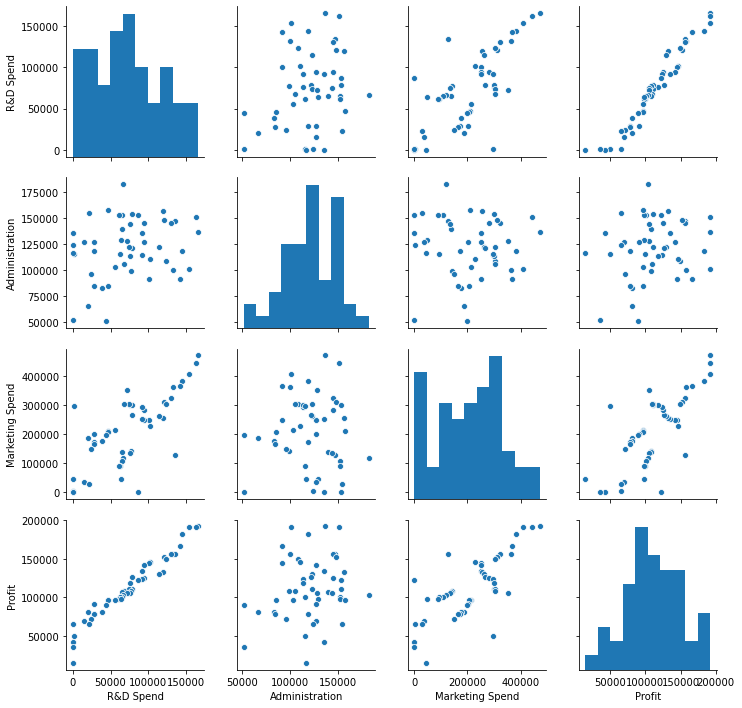

In [76]:
#explore the dataset using seaborn to generate some visualizations
sns.pairplot(start_ups)
# we can see R&D is related to Profit linearly. 

In [77]:
# # import preprocessing from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#create a LabelEncoder object
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
#convert categorical values for better prediction
onehotencoder = OneHotEncoder(categorical_features = [3])
#fit and transform
X = onehotencoder.fit_transform(X).toarray()
# Avoid the Dummy variable Trap
X = X[:, 1:]
#split the data set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

C:\Users\Pookie\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Pookie\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [78]:
from sklearn.linear_model import LinearRegression
#create a LinearRegression object
regressor = LinearRegression()
#fit the model
regressor.fit(X_train, y_train)
#predictions
y_pred = regressor.predict(X_test)
y_pred

array([126392.47862918,  88687.12901982, 130118.83110293,  67263.14132916,
       133435.36465499, 129346.20301918,  63617.04502159, 101092.40137651,
       162579.85297804,  81044.9187626 ])

In [79]:
regressor.score(X_test, y_test)

0.9324257127548153